In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_train = pd.read_csv("train.csv", sep=",")
df_train.head(11)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,114.95,4.0,0.0,de_inferno,False,500.0,500.0,493.0,400.0,3600.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,114.92,7.0,4.0,de_dust2,False,500.0,500.0,0.0,500.0,11950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,74.88,4.0,6.0,de_overpass,False,270.0,200.0,292.0,200.0,1700.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,21.46,1.0,1.0,de_nuke,True,100.0,268.0,100.0,385.0,150.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,175.00,9.0,6.0,de_mirage,False,500.0,500.0,200.0,300.0,2700.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,66.88,5.0,1.0,de_mirage,False,291.0,233.0,277.0,95.0,9700.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T
6,94.89,2.0,7.0,de_train,False,434.0,480.0,489.0,499.0,8850.0,...,4.0,3.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,CT
7,74.91,0.0,2.0,de_dust2,False,29.0,180.0,73.0,187.0,950.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,T
8,94.90,9.0,13.0,de_nuke,False,500.0,400.0,400.0,364.0,600.0,...,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,T
9,14.12,5.0,6.0,de_inferno,False,484.0,349.0,500.0,478.0,5900.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,T


### Описание элементов дата сета
* id - Идентификатор.
* time_left - Оставшееся время до конца текущего раунда.
* ct_score - Текущий счёт команды CT.
* t_score    - Текущий счёт команды T.
* map - Карта матча.
* bomb_planted - Наличие заложенной бомбы.
* ct_health - Общее количество очков здоровья команды CT.
* t_health - Общее количество очков здоровья команды T.
* ct_armor - Общее количество очков брони команды CT.
* t_armor - Общее количество очков брони команды T.
* ct_money - Общее количество денег команды CT.
* t_money - Общее количество денег команды T.
* ct_helmets    - Общее число шлемов в команде CT.
* t_helmets - Общее число шлемов в команде T.
* ct_defuse_kits - Общее число наборов сапёра в команде CT.
* ct_players_alive     - Количество живых игроков в команде CT.
* t_players_alive - Количество живых игроков в команде T.
* ct_weapon_X - Общее число оружия X в команде CT.
* t_weapon_X - Общее число оружия X в команде T.
* ct_grenade_X - Общее число гранат X в команде CT.
* t_grenade_X - Общее число гранат X в команде T.
* target - Победитель раунда.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82014 entries, 0 to 82013
Data columns (total 97 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_left                     82014 non-null  float64
 1   ct_score                      82014 non-null  float64
 2   t_score                       82014 non-null  float64
 3   map                           82014 non-null  object 
 4   bomb_planted                  82014 non-null  bool   
 5   ct_health                     82014 non-null  float64
 6   t_health                      82014 non-null  float64
 7   ct_armor                      82014 non-null  float64
 8   t_armor                       82014 non-null  float64
 9   ct_money                      82014 non-null  float64
 10  t_money                       82014 non-null  float64
 11  ct_helmets                    82014 non-null  float64
 12  t_helmets                     82014 non-null  float64
 13  c

In [4]:
df_train.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,...,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000,82014.000000
mean,98.015517,6.701112,6.773319,412.824591,402.988051,314.445729,298.464433,9770.425781,11209.450216,2.053601,...,1.853293,1.858829,1.539627,1.625223,1.000927,0.019899,0.047724,1.352501,0.027690,0.026044
std,54.418579,4.762211,4.806576,131.745622,139.830286,171.023084,174.583765,11181.916111,12145.102354,1.842050,...,1.773655,1.795406,1.735208,1.828701,1.455789,0.144207,0.226601,1.663625,0.169207,0.165132
min,0.010000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,352.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,378.000000,334.000000,5450.000000,7100.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.930000,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,17950.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,6.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


В описании мы видим что значеник здоровья у террористов больше 600, что является невозможным, посмотрим сколько ошибочных данных этого же типа присутствуют


In [5]:
df_train[df_train["t_health"] > 500]

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
26726,175.0,0.0,0.0,de_vertigo,False,400.0,600.0,0.0,0.0,3200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T


Мы видим что у нас единственная запись с невалидными данными и с учетом что раунды длятся 3 минуты, а этот рануд закончился за 5 секунд, что является аномальным значением, так что можем просто удалить ее.

In [6]:
df_train.drop(26726, inplace=True)
df_train.reset_index()

,index,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,0,114.95,4.0,0.0,de_inferno,False,500.0,500.0,493.0,400.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,1,114.92,7.0,4.0,de_dust2,False,500.0,500.0,0.0,500.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,2,74.88,4.0,6.0,de_overpass,False,270.0,200.0,292.0,200.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,3,21.46,1.0,1.0,de_nuke,True,100.0,268.0,100.0,385.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,4,175.00,9.0,6.0,de_mirage,False,500.0,500.0,200.0,300.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82008,82009,94.90,7.0,3.0,de_train,False,400.0,400.0,395.0,345.0,...,3.0,4.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,CT
82009,82010,55.69,9.0,11.0,de_nuke,False,400.0,379.0,400.0,357.0,...,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T
82010,82011,114.95,1.0,0.0,de_nuke,False,500.0,500.0,500.0,300.0,...,2.0,5.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,CT
82011,82012,106.95,11.0,8.0,de_dust2,False,500.0,500.0,490.0,200.0,...,2.0,3.0,2.0,4.0,0.0,1.0,1.0,0.0,0.0,CT


In [7]:
df_train.duplicated().sum()

2860

In [8]:
df_train.drop(columns=['map'], inplace=True)

In [9]:
df_bomba = pd.get_dummies(df_train.bomb_planted, dtype=int)
df_bomba.head(11)

,False,True
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [10]:
df_train.dropna()

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,114.95,4.0,0.0,False,500.0,500.0,493.0,400.0,3600.0,10200.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,114.92,7.0,4.0,False,500.0,500.0,0.0,500.0,11950.0,13950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,74.88,4.0,6.0,False,270.0,200.0,292.0,200.0,1700.0,7200.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,21.46,1.0,1.0,True,100.0,268.0,100.0,385.0,150.0,1750.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,175.00,9.0,6.0,False,500.0,500.0,200.0,300.0,2700.0,650.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82009,94.90,7.0,3.0,False,400.0,400.0,395.0,345.0,2250.0,11350.0,...,3.0,4.0,2.0,2.0,0.0,0.0,4.0,0.0,0.0,CT
82010,55.69,9.0,11.0,False,400.0,379.0,400.0,357.0,450.0,10750.0,...,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,T
82011,114.95,1.0,0.0,False,500.0,500.0,500.0,300.0,450.0,1350.0,...,2.0,5.0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,CT
82012,106.95,11.0,8.0,False,500.0,500.0,490.0,200.0,2050.0,9400.0,...,2.0,3.0,2.0,4.0,0.0,1.0,1.0,0.0,0.0,CT


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yhat = le.fit_transform(df_train['bomb_planted'])
df_train['bomb_planted'] = yhat

In [12]:
df_train.head(10)

,time_left,ct_score,t_score,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,target
0,114.95,4.0,0.0,0,500.0,500.0,493.0,400.0,3600.0,10200.0,...,2.0,5.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,CT
1,114.92,7.0,4.0,0,500.0,500.0,0.0,500.0,11950.0,13950.0,...,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,T
2,74.88,4.0,6.0,0,270.0,200.0,292.0,200.0,1700.0,7200.0,...,2.0,1.0,2.0,0.0,0.0,1.0,2.0,1.0,0.0,CT
3,21.46,1.0,1.0,1,100.0,268.0,100.0,385.0,150.0,1750.0,...,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,T
4,175.00,9.0,6.0,0,500.0,500.0,200.0,300.0,2700.0,650.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
5,66.88,5.0,1.0,0,291.0,233.0,277.0,95.0,9700.0,6400.0,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,T
6,94.89,2.0,7.0,0,434.0,480.0,489.0,499.0,8850.0,2800.0,...,4.0,3.0,3.0,4.0,0.0,0.0,3.0,0.0,0.0,CT
7,74.91,0.0,2.0,0,29.0,180.0,73.0,187.0,950.0,7600.0,...,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,T
8,94.90,9.0,13.0,0,500.0,400.0,400.0,364.0,600.0,11850.0,...,3.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,T
9,14.12,5.0,6.0,0,484.0,349.0,500.0,478.0,5900.0,1450.0,...,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,T


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
yhat1 = le.fit_transform(df_train['bomb_planted'])
df_train['bomb_planted'] = yhat1

In [14]:
le = LabelEncoder()
yhat3 = le.fit_transform(df_train['target'])
df_train['target'] = yhat3

In [15]:
df_train[['t_armor','ct_armor','bomb_planted','ct_score','t_score','ct_defuse_kits']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 82013 entries, 0 to 82013
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t_armor         82013 non-null  float64
 1   ct_armor        82013 non-null  float64
 2   bomb_planted    82013 non-null  int64  
 3   ct_score        82013 non-null  float64
 4   t_score         82013 non-null  float64
 5   ct_defuse_kits  82013 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 4.4 MB


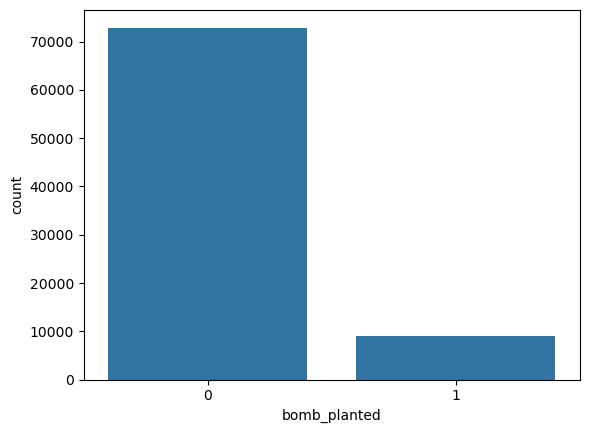

In [16]:
sns.countplot(x='bomb_planted', data=df_train);

Бомбу устанавливали очень малое количество раз, значит большинство раундом заканчивалось либо истечением времени либо устранением команды 1 из сторон

In [17]:
usable_df = ['ct_score', 't_score', 'bomb_planted', 
              'ct_armor', 't_armor', 'ct_money', 't_money', 
              'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
              'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
              'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
              'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
              't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
              'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
              't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
              'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
              'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
              'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
              'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
              'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
              'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
              't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
              'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
              't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
              'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
              't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
              'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
              't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
              't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9',
              'ct_grenade_hegrenade', 't_grenade_hegrenade', 'ct_grenade_flashbang',
              't_grenade_flashbang', 'ct_grenade_smokegrenade',
              't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
              't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
              't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
              't_grenade_decoygrenade']
X = df_train[usable_df]
print(X.shape)

(82013, 90)


In [18]:
y = df_train["target"]
y.value_counts()

target
1    41788
0    40225
Name: count, dtype: int64

In [19]:
no_weapon_columns = ['time_left', 'ct_score', 't_score', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor', 'ct_money', 
                     't_money', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive', 'target']

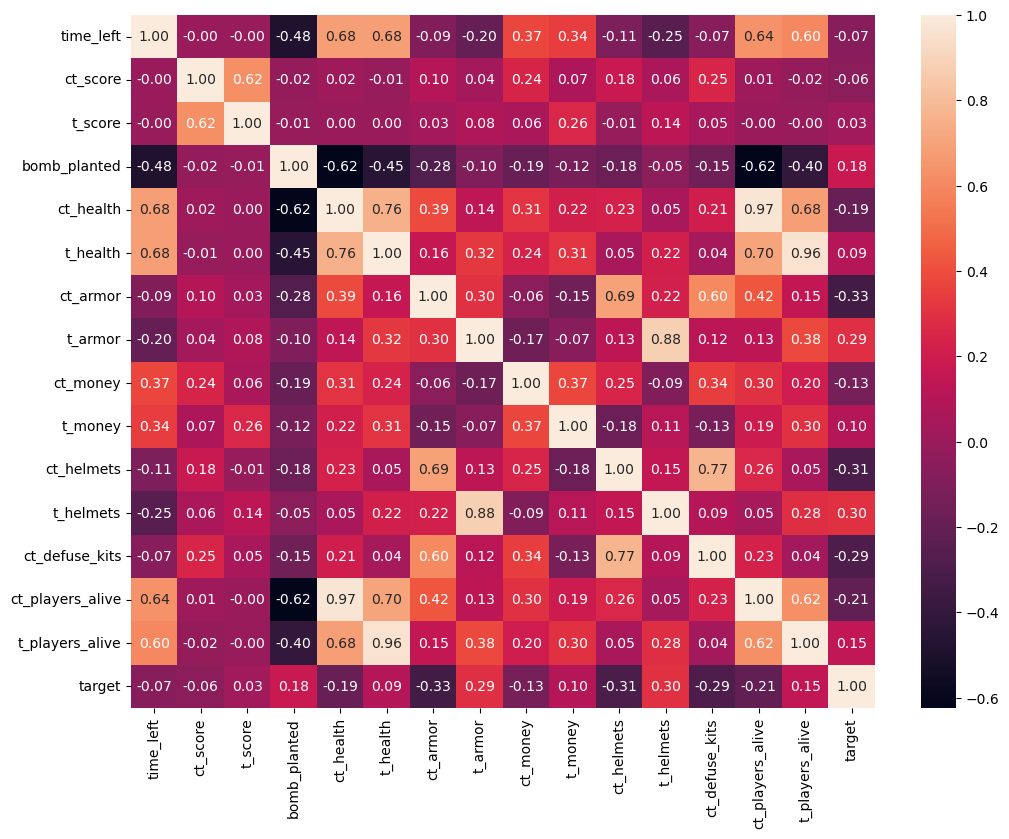

In [35]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_train[no_weapon_columns].corr(), annot=True, ax=ax, fmt = '0.2f')
plt.show()

Количество здоровья напрямую зависит от количества живых игроков и состояние команды.

Зачастую, бомбу устанавливают при малом количестве живих игроков, и малом оставшемся времени.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
pred_test_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, pred_test_knn, normalize=True)
knn_accuracy

0.7231479770921855

#### Довольно хорошая точность показала модель KNeighborsClassifier

In [25]:
gnb = GaussianNB()
gnb.fit(X, y);

In [26]:
gnb_pred_test = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)
gnb_accuracy

0.7292444116016996

Тоже довольно хороший показатель для GaussianNB

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train, y_train);

In [31]:
xgb_pred_test = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred_test)
xgb_accuracy

0.7946055791612784

In [32]:
print(f"KNN ---> {knn_accuracy}")
print(f"GNB ---> {gnb_accuracy}")
print(f"XGB ---> {xgb_accuracy}")

KNN ---> 0.7231479770921855
GNB ---> 0.7292444116016996
XGB ---> 0.7946055791612784


In [36]:
from sklearn.metrics import classification_report 

In [37]:
print(classification_report(pred_test_knn, y_test))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72     13192
           1       0.73      0.72      0.73     13873

    accuracy                           0.72     27065
   macro avg       0.72      0.72      0.72     27065
weighted avg       0.72      0.72      0.72     27065



In [38]:
print(classification_report(gnb_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73     13449
           1       0.73      0.73      0.73     13616

    accuracy                           0.73     27065
   macro avg       0.73      0.73      0.73     27065
weighted avg       0.73      0.73      0.73     27065



In [41]:
print(classification_report(xgb_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79     13590
           1       0.79      0.80      0.80     13475

    accuracy                           0.79     27065
   macro avg       0.79      0.79      0.79     27065
weighted avg       0.79      0.79      0.79     27065



In [63]:
accuracy_comparison = pd.DataFrame({'KNN': [round(knn_accuracy, 3)], "GNB": [round(gnb_accuracy, 3)], "XGB": [round(xgb_accuracy, 3)]})
accuracy_comparison

,KNN,GNB,XGB
0,0.723,0.729,0.795


### Итог

Проанализировав данные мы выяснили что бомба в играх устанавливалась очень редко, было выявлено 1 аномальное значение у показателей здоровья террористов. 

По показателям модели данных мы выяснили что самым точным является eXtreme Gradient Boosting и изучив что он является улучшеной версией RFC.

Так же мы увидели что среди трех представленных моделей, XGB показал наиболее точный результат